Write Python code to find the quality of your degraded face image compared to your original face image without using the built-in function of PSNR.
To get the degraded image, use the built-in function to:
1) Blur the image,
2) Add Gaussian noise and
3) Compress using JPEG 2000 and then decompress it around 70% - 80%.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

PSNR: 39.348689839728216


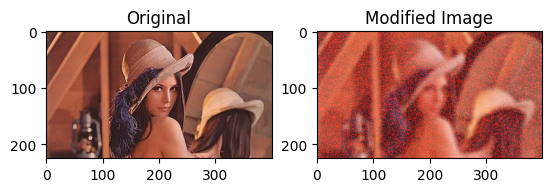

In [8]:
image = cv2.imread('lena_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Blurring the image
blurred_image = cv2.blur(image, (9, 9))

#Add Gaussian noise
mean = 0
std = 180
noise = np.zeros(blurred_image.shape, np.uint8)
cv2.randn(noise, mean, std)

noisy_image = cv2.add(blurred_image, noise)

# cv2.imwrite('compressed_image.jp2', noisy_image)

encode_param = [int (cv2.IMWRITE_JPEG_QUALITY), 70]
res, encimage = cv2.imencode('.jp2', noisy_image, encode_param)

decimage = cv2.imdecode(encimage, 1)

plt.subplot(121)
plt.imshow(image)
plt.title('Original')

plt.subplot(122)
plt.imshow(decimage)
plt.title('Modified Image')

#Calculating PSNR
mse = np.mean((image - decimage) ** 2)
if mse == 0:
    print('No noise is present')
else:
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel**2)/np.sqrt(mse))
    print(f'PSNR: {psnr}')